# Asymptotic n-Particle Entanglement in a Luttinger Liquid after a Quantum Quench

## Effects of Next-Nearest Neighbor Interactions: $V^\prime$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi as π

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.reload_library()
plt.style.use('notebook')
from collections import defaultdict
from scipy.special import binom
import pickle
import os
import scipy.signal as signal

import dgutils.colors as colortools

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# plot style
plot_style = {'notebook':'./include/notebook.mplstyle','aps':'./include/sf.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
figsize = plt.rcParams['figure.figsize']
plt.rcParams['text.latex.preamble'] = f'\input{{{os.getcwd()}/include/texheader}}'

style_file = plot_style['aps']

### Load useful quench functions from a script

In [2]:
import quenchutils as quench

## Load ED data from disk 

In the ED code, times are measured in units of inverse hopping, i.e. we measure $\overline{t} = t J$.  We need to convert to the dimensionless time used for the Luttinger liquid which is measured in units of $a/v$, i.e. $v t / a$ where $a = 2a_0$ with $a_0$ the lattice spacing.  This is accomplished using the fact that from the Bethe Ansatz of the $J-V$ model we know:


\begin{equation}
\frac{v}{J a} = \frac{\pi}{2} \frac{\sqrt{1-(V/2)^2}}{\cos^{-1}(V/2)} 
\end{equation}

thus:

\begin{align*}
\frac{v t}{a} &= \frac{v}{J a}\, t J  \newline
& = (J t) \, \frac{\pi}{2} \frac{\sqrt{1-(V/2)^2}}{\cos^{-1}(V/2)}
\end{align*}

We can thus multiply our ED timescale by $\frac{\pi}{2} \frac{\sqrt{1-(V/2)^2}}{\cos^{-1}(V/2)}$.

In [3]:
EDp_n = {}
EDs_n = {}

Vi = 0.0
Vf = [0.250]
Δt = 0.1
ti = 0.0
tf = 100.0

N = np.array([4,5,6,7,8,9,10,11,12,13])

n = [[1, int(cN/2)] for cN in N]
colors = colortools.get_linear_colors('Spectral',len(N)+1,reverse=False)

# Three possible values of the next-nearest neighbor interaction

Vpf = [0.0, 0.025, 0.355]
for cVf in Vf:
    for cVpf in Vpf:
    
        for i,cN in enumerate(N):
            for cn in n[i]:
                data_dir = '../data/quench/ED/'
                try:
                    p_data = np.loadtxt(quench.get_ED_fname(cN,Vi,cVf,Δt,ti,tf,cn,data_dir,Vpf=cVpf))
                    EDp_n[quench.lookup(cN,Vi,cVf,Δt,cn,Vpf=cVpf)] = p_data
                except:
                    print("Can't load: {:s}".format(quench.get_ED_fname(cN,Vi,cVf,Δt,ti,tf,cn,data_dir,Vpf=cVpf)))

                if cn == 1:
                    try:                   
                        s_data = np.loadtxt(quench.get_ED_fname(cN,Vi,cVf,Δt,ti,tf,cn,data_dir,fmt='spatEE',Vpf=cVpf))
                        EDs_n[quench.lookup(cN,Vi,cVf,Δt,cn,Vpf=cVpf)] = s_data
                    except:
                        print("Can't load: {:s}".format(quench.get_ED_fname(cN,Vi,cVf,Δt,ti,tf,cn,data_dir,fmt='spatEE',Vpf=cVpf)))


## Plot the $n = \lfloor N/2 \rfloor$ entanglement per particle

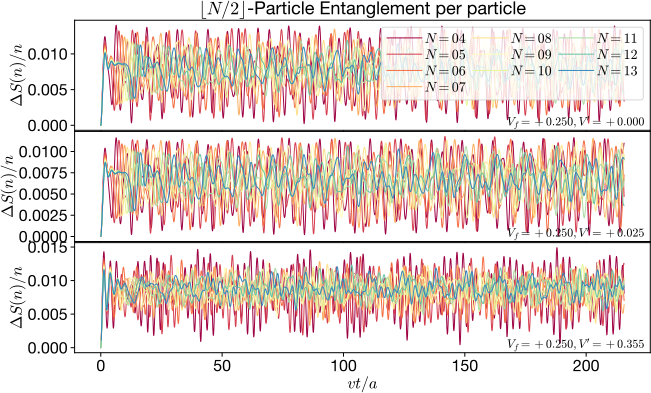

In [4]:
from scipy.interpolate import interp1d

with plt.style.context('notebook'):

    fig, axes = plt.subplots(len(Vpf),1,sharex=True, sharey=False, squeeze=True, figsize=(10,6))
    fig.subplots_adjust(hspace=0.01)
    #axes = np.array([axes])
    cVf = 0.25

    for iV,cVpf in enumerate(Vpf):
        for i,cN in enumerate(N):
            cn = int(cN/2)
            norm = 0.5*(1.0/cn + 1.0/(cN-cn))
            key = quench.lookup(cN,Vi,cVf,Δt,cn,Vpf=cVpf)
            if key in EDp_n:
                label = r'${:s}$'.format(key.split(',')[0])
                x = np.linspace(EDp_n[key][0,0]*quench.tscalefactor(cVf),EDp_n[key][-1,0]*quench.tscalefactor(cVf),10000)
                y = interp1d(EDp_n[key][:,0]*quench.tscalefactor(cVf), EDp_n[key][:,1]*norm, kind='cubic')
                axes[iV].plot(x,y(x),marker='None', color=colors[i], linewidth=1, mew=0, label=label, ms=3)

        axes[iV].set_ylabel('$\Delta S(n)/n$')
        axes[iV].text(0.99,0.01,f'$V_f = {cVf:+5.3f}, V^\prime = {cVpf:+5.3f}$',transform=axes[iV].transAxes, fontsize=12, ha='right', va='bottom')

    axes[0].legend(frameon=True, loc='upper right',ncol=3, handletextpad=0.2, columnspacing=0.5)
    axes[0].set_title(r'$\lfloor N/2 \rfloor$-Particle Entanglement per particle')
    axes[-1].set_xlabel('$v t / a$');
#plt.xlim(0,10);

#plt.savefig('Output/Vprime_DeltaSn_vs_t_ED.pdf')
#plt.savefig('/Users/agdelma/Desktop/DeltaSn_vs_t_ED.png',dpi=400)

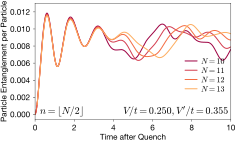

In [5]:
from scipy.interpolate import interp1d

#colors = ['#92d3a5','#486cb0','#d8434e','green']
with plt.style.context('sans_aps'):

    fig, axes = plt.subplots(1,1,sharex=True, sharey=False, squeeze=True)
    fig.subplots_adjust(hspace=0.01)
    axes = [axes]
    cVf = 0.25
    cVpf = 0.355
    iV = 0

    for i,cN in enumerate(N[-4:]):
        cn = int(cN/2)
        norm = 0.5*(1.0/cn + 1.0/(cN-cn))
        key = quench.lookup(cN,Vi,cVf,Δt,cn,Vpf=cVpf)
        if key in EDp_n:
            label = r'${:s}$'.format(key.split(',')[0])
            x = np.linspace(EDp_n[key][0,0],EDp_n[key][-1,0],10000)
            y = interp1d(EDp_n[key][:,0], EDp_n[key][:,1]*norm, kind='cubic')
            axes[iV].plot(x,y(x),marker='None', color=colors[i], linewidth=1, mew=0, label=label, ms=3)

        axes[iV].set_ylabel('Particle Entanglement per Particle')
    axes[0].text(0.45,0.05,f'$V/t = {cVf:5.3f}, V^\prime/t = {cVpf:5.3f}$',transform=axes[iV].transAxes, fontsize=10)

    axes[0].legend(loc=(0.75,0.2), ncol=1, handletextpad=0.5, columnspacing=0.5, handlelength=1.5)
    axes[0].text(0.025,0.05, r'$n = \lfloor N/2 \rfloor$',transform=axes[iV].transAxes, fontsize=10)
    axes[-1].set_xlabel('Time after Quench', weight='light');
    axes[0].set_xlim(0,10);

#plt.savefig('/Users/agdelma/Documents/UTK/Projects/Visualization/Entanglement/SciDAC/Vprime_DeltaSn_vs_t_ED.pdf')
#plt.savefig('/Users/agdelma/Documents/UTK/Projects/Visualization/Entanglement/SciDAC/Vprime_DeltaSn_vs_t_ED.svg')
#plt.savefig('/Users/agdelma/Desktop/DeltaSn_vs_t_ED.png',dpi=400)

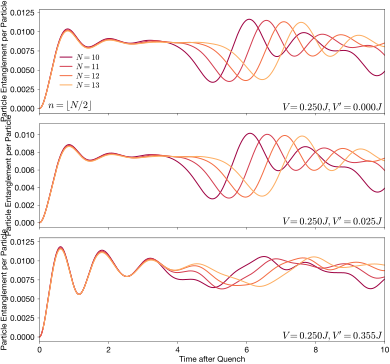

In [6]:
from scipy.interpolate import interp1d

#colors = ['#92d3a5','#486cb0','#d8434e','green']
with plt.style.context('sans_aps'):

    fig, axes = plt.subplots(len(Vpf),1,sharex=True, sharey=False, squeeze=True,figsize=(6,6))
    fig.subplots_adjust(hspace=0.1)
    cVf = 0.25
    
    for iV,cVpf in enumerate(Vpf):
        for i,cN in enumerate(N[-4:]):
            cn = int(cN/2)
            norm = 0.5*(1.0/cn + 1.0/(cN-cn))
            key = quench.lookup(cN,Vi,cVf,Δt,cn,Vpf=cVpf)
            if key in EDp_n:
                label = r'${:s}$'.format(key.split(',')[0])
                x = np.linspace(EDp_n[key][0,0],EDp_n[key][-1,0],10000)
                y = interp1d(EDp_n[key][:,0], EDp_n[key][:,1]*norm, kind='cubic')
                axes[iV].plot(x,y(x),marker='None', color=colors[i], linewidth=1, mew=0, label=label, ms=3)

            axes[iV].set_ylabel('Particle Entanglement per Particle')
        axes[iV].text(0.99,0.01,f'$V = {cVf:5.3f}J, V^\prime = {cVpf:5.3f}J$',transform=axes[iV].transAxes, fontsize=10, ha='right', va='bottom')

    axes[0].legend(loc=(0.05,0.2), ncol=1, handletextpad=0.5, columnspacing=0.5, handlelength=1.5)
    axes[0].text(0.025,0.05, r'$n = \lfloor N/2 \rfloor$',transform=axes[0].transAxes, fontsize=10)
    axes[-1].set_xlabel('Time after Quench', weight='light');
    axes[0].set_xlim(0,10);

#plt.savefig('/Users/agdelma/Documents/UTK/Projects/Visualization/Entanglement/SciDAC/Vprime_DeltaSn_vs_t_ED.pdf')
#plt.savefig('/Users/agdelma/Documents/UTK/Projects/Visualization/Entanglement/SciDAC/Vprime_DeltaSn_vs_t_ED.svg')
#plt.savefig('/Users/agdelma/Desktop/DeltaSn_vs_t_ED.png',dpi=400)

## Plot the Spatial Entanglement per particle with the $t=0$ contribution removed

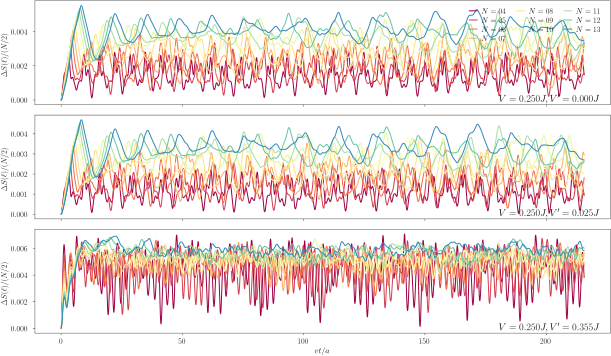

In [7]:
fig, axes = plt.subplots(len(Vpf),1,sharex=True, sharey=False, squeeze=True,figsize=(10,6))
fig.subplots_adjust(hspace=0.1)

for iV,cVpf in enumerate(Vpf):
    for i,cN in enumerate(N):
        key = quench.lookup(cN,Vi,cVf,Δt,1,Vpf=cVpf)
        label = r'${:s}$'.format(key.split(',')[0])

        if key in EDs_n:
            x = np.linspace(EDs_n[key][0,0]*quench.tscalefactor(cVf),EDs_n[key][-1,0]*quench.tscalefactor(cVf),10000)
            y = interp1d(EDs_n[key][:,0]*quench.tscalefactor(cVf),(EDs_n[key][:,1]-1.0*EDs_n[key][0,1])/(cN/2), kind='cubic')
            axes[iV].plot(x,y(x),marker='None', color=colors[i],  linewidth=1.0, label=label)
            
    axes[iV].set_ylabel('$\Delta S(\ell)/(N/2)$')
    axes[iV].text(0.99,0.01,f'$V = {cVf:5.3f}J, V^\prime = {cVpf:5.3f}J$',transform=axes[iV].transAxes, fontsize=10, ha='right', va='bottom')


axes[0].legend(frameon=False, loc='upper right',ncol=3, handletextpad=0.5, columnspacing=1, handlelength=1.0)
axes[-1].set_xlabel('$v t / a$');
#plt.savefig('/Users/agdelma/Desktop/DeltaSl_vs_t_ED.png',dpi=400)
#axes[-1].set_xlim(0,10);

### Extract the asymptotic value

For the special case where $N$ is odd and $n = (N-1)/2$ we normalize via:

\begin{equation}
\frac{S_1(n)}{n} \to \frac{1}{2}\left[\frac{1}{n}S_1(n) + \frac{1}{N-n}S_1(N-n)\right] = S_1\left(n=\frac{N-1}{2}\right) \left(\frac{1}{N-1} + \frac{1}{N+1}\right)
\end{equation}

In [8]:
from scipy.signal import argrelextrema

A1_asymp, ΔA1_asymp = {},{}
S1_asymp, ΔS1_asymp = {},{}

for iV,cVpf in enumerate(Vpf):
    for i,cN in enumerate(N):
        for cn in n[i]: 
            key = quench.lookup(cN,Vi,cVf,Δt,cn,Vpf=cVpf)

            if key in EDp_n:
                # this is the recurrence time predicted by LL theory
                idx = np.where(np.abs(EDp_n[key][:,0]*quench.tscalefactor(cVf)-cN)<Δt*quench.tscalefactor(cVf))[0][0]

                if cn == int(cN/2):
                    norm = 0.5*(1.0/cn + 1.0/(cN-cn))
                else:
                    norm = 1.0/cn

                cdata = EDp_n[key][idx:,1]*norm
                A1_asymp[key] = np.average(cdata)
                nb,Δ,ΔA1_asymp[key] = quench.binning_error(cdata)                

            if cn == 1 and key in EDs_n:
                idx = np.where(np.abs(EDs_n[key][:,0]*quench.tscalefactor(cVf)-2*cN)<Δt*quench.tscalefactor(cVf))[0][0]

                norm = 2/cN
                cdata = (EDs_n[key][idx:,1]-EDs_n[key][0,1])*norm
                S1_asymp[key] = np.average(cdata)
                nb,Δ,ΔS1_asymp[key] = quench.binning_error(cdata)
                

## Combine Asymptotic Values and perform a FSS fit

## Perform the finite size scaling and determine error bars

First we perform a fit that includes the last 4 points and obtain the uncertainty using error bars computed from the time asymptotic average

Now, to understand the uncertainty in the extrapoltion, we include 3 and 5 points in the fit, compute the differences and extract an error.

In [9]:
starts = [-3,-5]

fS1_fit,fAn_fit = {},{}
ΔfS1_fss,ΔfAn_fss = {},{}
fS1_fit, ΔfS1_fss, fAn_fit, ΔfAn_fss = quench.perform_fss(-4,[cVf],S1_asymp,ΔS1_asymp,A1_asymp,
                                                   ΔA1_asymp,N,Vi,Δt,n,Vpf=Vpf)

for iV,cVpf in enumerate(Vpf):
    Vkey = quench.vkey(cVf,Vpf=cVpf)
    Δfss_s_squared = 0.0
    Δfss_p_squared = 0.0

    for start in starts:
        fss = quench.perform_fss(start,[cVf],S1_asymp,ΔS1_asymp,A1_asymp,ΔA1_asymp,N,Vi,Δt,n,Vpf=[cVpf])
        Δfss_s_squared += (fss[0][Vkey](0.0)-fS1_fit[Vkey](0.0))**2
        Δfss_p_squared += (fss[2][Vkey](0.0)-fAn_fit[Vkey](0.0))**2
    
    Δfss_p_squared /= len(starts)
    Δfss_s_squared /= len(starts)
    ΔfS1_fss[Vkey] = np.sqrt(ΔfS1_fss[Vkey]**2 + Δfss_s_squared)
    ΔfAn_fss[Vkey] = np.sqrt(ΔfAn_fss[Vkey]**2 + Δfss_p_squared)   

### 1/N Log N fit

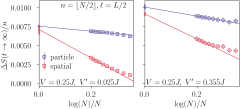

In [10]:
fig, axes = plt.subplots(1,2,sharex=True, sharey=True, squeeze=True, figsize=[figsize[0],3/4.0*figsize[1]],
                        constrained_layout=True)
axes = axes.flatten()

inv_N_fit = np.linspace(1E-16,0.5,1000)
x = inv_N_fit*np.log(1/inv_N_fit)


palpha = {quench.vkey(cVf):0.0, quench.vkey(cVf,Vpf=Vpf[1]):1.0, quench.vkey(cVf,Vpf=Vpf[2]):1.0}
pls = {quench.vkey(cVf):'-', quench.vkey(cVf,Vpf=Vpf[1]):'-', quench.vkey(cVf,Vpf=Vpf[2]):'-'}
pmarkers = {quench.vkey(cVf):'o', quench.vkey(cVf,Vpf=Vpf[1]):'s', quench.vkey(cVf,Vpf=Vpf[2]):'D'}

    #l1 = plt.legend([po1,po2],['',''],loc=(0.234,0.095), handlelength=2.5)
    #ax1.legend(loc=(0.01,0.0),handlelength=2.5)
    #l1 = plt.legend([po1,po2],['',''],loc=(0.234,0.095), handlelength=2.5)
    #ax1.legend(loc=(0.01,0.0),handlelength=2.5)
    #plt.gca().add_artist(l1)
    
for iV,cVpf in enumerate(Vpf):
    
    Vkey = quench.vkey(cVf,Vpf=cVpf)
    
    iV_start = iV
    if iV == 0:
        iV_end = 2
    elif iV == 1:
        iV_start = 0
        iV_end = 1
    else:
        iV_start = 1
        iV_end = 2
        
    bar_alpha = 0.6
    if iV == 0:
        bar_alpha = 0.0
            
    for idx in range(iV_start,iV_end):

        # ========================== PARTICLE ENTANGLEMENT ====================================== 

        # Particle Entanglement Fit
        axes[idx].plot(-np.log(inv_N_fit)*inv_N_fit,fAn_fit[Vkey](x), color=colors[-1], 
                     lw=0.5,ls=pls[Vkey], alpha=palpha[Vkey])
        low = fAn_fit[Vkey](x[0])-ΔfAn_fss[Vkey]
        high = fAn_fit[Vkey](x[0])+ΔfAn_fss[Vkey]
        axes[idx].fill_between([-0.004,0.004],[low,low],[high,high],clip_on=False, zorder=10, 
                                     color=colors[-1], alpha=bar_alpha,edgecolor='None')


        # particle entanglement ED data
        props = {'mec':colors[-1],'mew':0.5, 'ecolor':colors[-1], 'elinewidth':0.5, 'ls':'None','ms':3,
                 'mfc':colortools.get_alpha_hex(colors[-1],0.5)+'80', 'marker':pmarkers[Vkey]}
        if iV == 0:
            props['alpha'] = 0.0

        for i,cN in enumerate(N):
            cn = n[i][-1]

            key = quench.lookup(cN,Vi,cVf,Δt,cn,Vpf=cVpf)
            if key in A1_asymp:
                #label = r'${:s}$'.format(key.split(',')[0] + ',' + key.split(',')[-1])
                if i == 0 and iV==1:
                    label = r'particle'
                else:
                    label=''
                axes[idx].errorbar(1/cN*np.log(cN),A1_asymp[key],yerr=ΔA1_asymp[key],label=label, **props)
                
        # ========================== SPATIAL ENTANGLEMENT ======================================     

        # spatial entanglement fit
        axes[idx].plot(-inv_N_fit*np.log(inv_N_fit),fS1_fit[Vkey](x), color=colors[1],
                     lw=0.5, ls=pls[Vkey], alpha=palpha[Vkey])
        low = fS1_fit[Vkey](x[0])-ΔfS1_fss[Vkey]
        high = fS1_fit[Vkey](x[0])+ΔfS1_fss[Vkey]
        axes[idx].fill_between([-0.004,0.004],[low,low],[high,high],clip_on=False, zorder=5, 
                             color=colors[1], alpha=bar_alpha,edgecolor='None')
    

        # spatial entanglement ED data
        props = {'mec':colors[1],'mew':0.5, 'ecolor':colors[1], 'elinewidth':0.5,'ms':3, 'ls':'None',
                 'mfc':colortools.get_alpha_hex(colors[1],0.5)+'80', 'marker':pmarkers[Vkey]}
        if iV == 0:
            props['alpha'] = 0.0

        for i,cN in enumerate(N):
            key = quench.lookup(cN,Vi,cVf,Δt,1,Vpf=cVpf)
            if i == 0 and iV==1:
                label = f'spatial'
            else:
                label=''

            if key in S1_asymp:
                axes[idx].errorbar(1.0/cN*np.log(cN),S1_asymp[key],yerr=ΔS1_asymp[key],label=label, **props)
            
axes[0].set_xlim(0,0.36)
axes[0].set_xlabel('$\log (N) / N$')
axes[1].set_xlabel('$\log (N) / N$')

axes[0].set_ylabel(r'$\Delta S(t\to\infty)/n$');
axes[0].legend(loc=(0,.15), frameon=False, fontsize=8, labelspacing=0.25, 
                   handletextpad=0.5, handlelength=0.5)
axes[0].text(0.99,0.99,r'$n = \lfloor N/2 \rfloor , \ell = L/2$',transform=axes[0].transAxes, 
             ha='right', va='top', fontsize=8)

for iV,cVpf in enumerate(Vpf[1:]):
    axes[iV].text(0.01,0.00,f'$V = {cVf:5.2f}J,\; V^\prime={cVpf:5.3f}J$',transform=axes[iV].transAxes, ha='left', fontsize=8,va='bottom')

plt.savefig('../figures/asymptotic_entropy_vs_invN_VPrime.pdf')
plt.savefig('../figures/asymptotic_entropy_vs_invN_VPrime.svg')

In [64]:
with open('../data/S_asymp_VPrime.pickle', 'wb') as pfile:
    pickle.dump([fS1_fit,ΔfS1_fss,fAn_fit,ΔfAn_fss], pfile, pickle.HIGHEST_PROTOCOL)

In [32]:
0.355/0.25

1.42